<a href="https://colab.research.google.com/github/MadhuraTonpe165/Assignments/blob/main/Time_Series_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Important Lbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
df = pd.read_csv('multiTimeline.csv')
df.head()

,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [ ]:
# Getting an idea about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    168 non-null    object
 1   Diet     168 non-null    int64 
 2   Gym      168 non-null    int64 
 3   Finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [ ]:
# Converting 'Month' to datetime format
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)
df.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


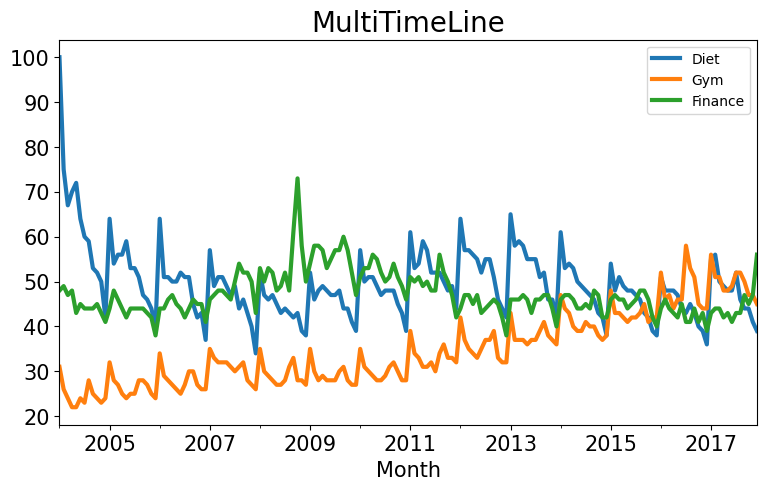

In [ ]:
# Plot
df.plot(figsize= (9,5), linewidth = 3, fontsize= 15)
plt.title('MultiTimeLine', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.show()

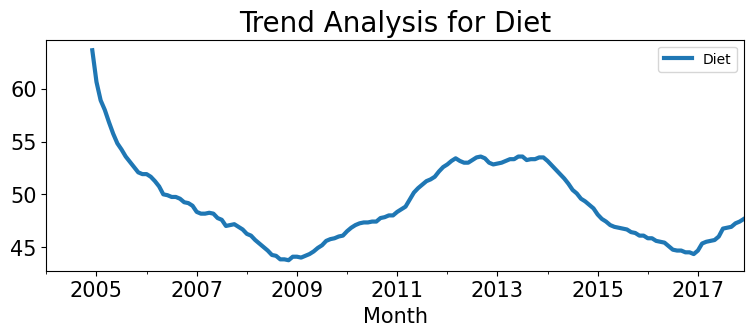

In [ ]:
# Check for trend
diet = df[['Diet']]
diet.rolling(12).mean().plot(figsize = (9, 3), linewidth = 3, fontsize = 15)
plt.title('Trend Analysis for Diet', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.show()

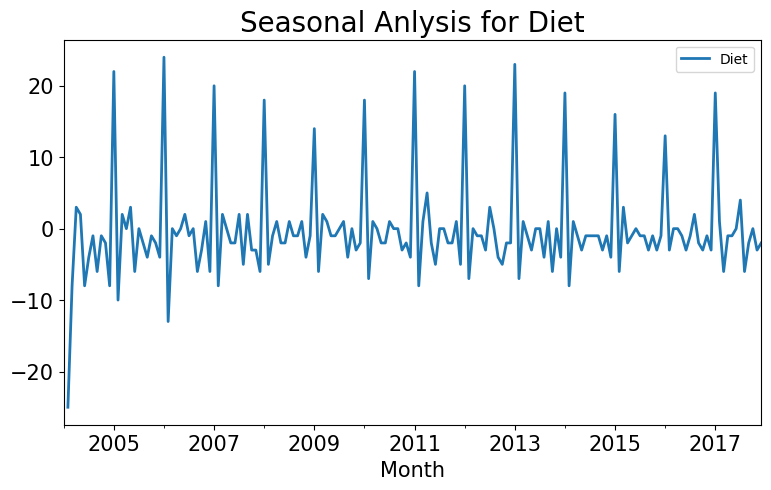

In [ ]:
# Check for seasonality
diet.diff().plot(figsize = (9, 5), linewidth = 2, fontsize = 15)
plt.title('Seasonality Anlysis for Diet', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.show()
# as we can sea a seasonal pattern in data we can use SARIMA

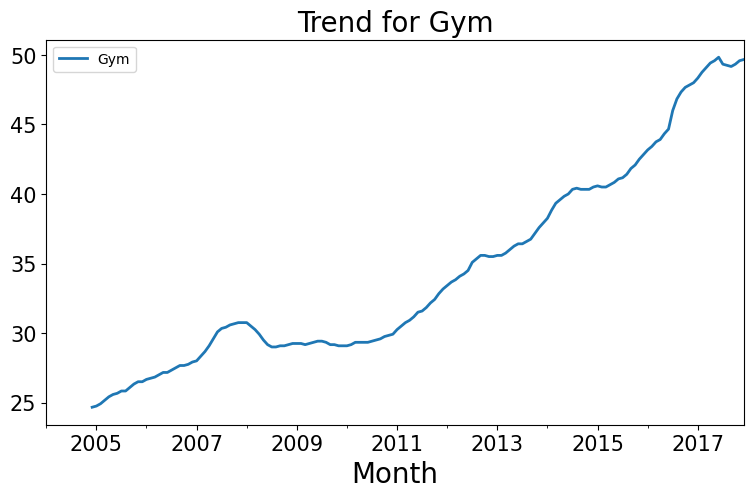

In [ ]:
# Check for Trend in 'gym'
gym = df[['Gym']]
gym.rolling(12).mean().plot(figsize = (9,5), linewidth = 2, fontsize = 15)
plt.title('Trend Analysis for Gym', fontsize = 20 )
plt.xlabel('Month', fontsize = 20)
plt.show()
# clear trend

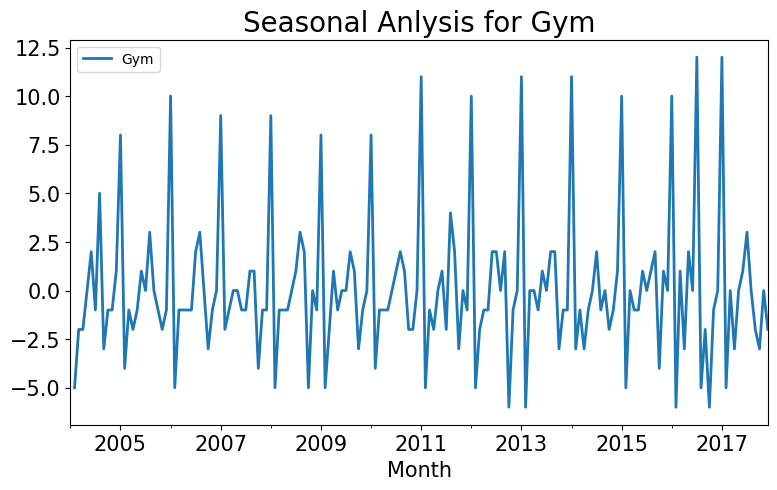

In [ ]:
# Check for seasonality in 'gym'
gym.diff().plot(figsize = (9, 5), linewidth = 2, fontsize = 15)
plt.title('Seasonality Anlysis for Gym', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.show()

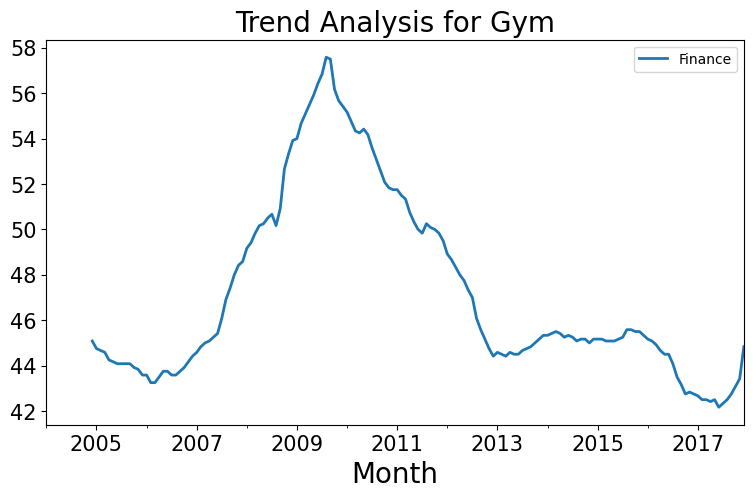

In [ ]:
# Check for Trend in 'Finance'
finance = df[['Finance']]
finance.rolling(12).mean().plot(figsize = (9,5), linewidth = 2, fontsize = 15)
plt.title('Trend Analysis for Gym', fontsize = 20 )
plt.xlabel('Month', fontsize = 20)
plt.show()
# no clear trend

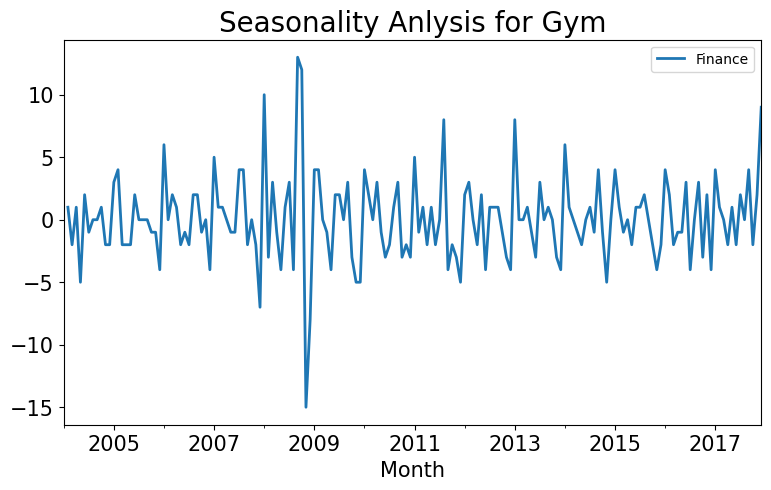

In [ ]:
# Check for seasonality in 'Finance'
finance.diff().plot(figsize = (9, 5), linewidth = 2, fontsize = 15)
plt.title('Seasonality Anlysis for Finance', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.show()

In [ ]:
# ARIMA for diet prediction

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diet, order = (1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diet   No. Observations:                  168
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -537.817
Date:                Sat, 12 Jul 2025   AIC                           1081.634
Time:                        09:06:04   BIC                           1090.988
Sample:                    01-01-2004   HQIC                          1085.431
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2604      0.153      1.705      0.088      -0.039       0.560
ma.L1         -0.7273      0.089     -8.161      0.000      -0.902      -0.553
sigma2        36.6219      3.164     11.575      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
'''
ACF and PCAF ->
ACF -> Autocorrelation Function
PACF -> Partial Autocorrelation Functions

Since the correlations time series observation is calculated with
values of the same series at different time lags, it is called autocorrelation

a ploot of autocorrelation of a dataset of time series
by lag is called as Autocorrelation function
'''

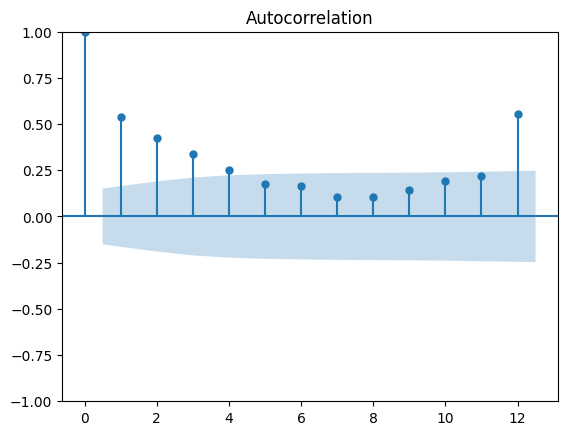

In [ ]:
# ACF Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diet, lags =12)
plt.show()

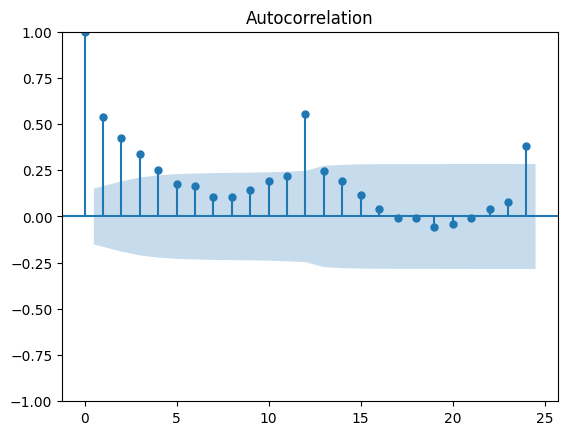

In [ ]:
# # ACF Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diet, lags =24)
plt.show()

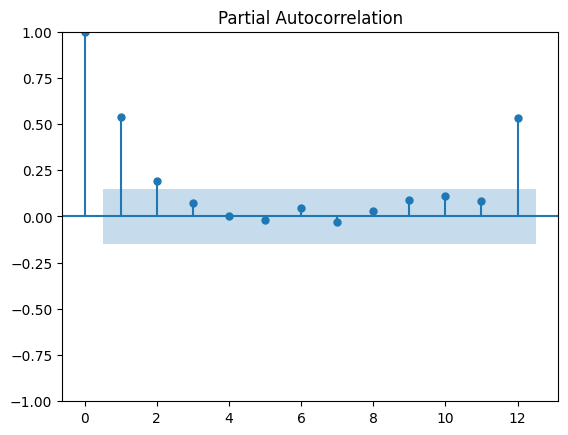

In [ ]:
# PACF Partial correlation
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diet, lags = 12)
plt.show()

In [ ]:
'''
Interview questions ->

ACF -> ACF measures the correlation between a time series and ts lagged values

PACF -> PACF measures the correlation between a time series and its lagged value
after removing the effect of the intermedate lags.
'''